# Step 1: Load CSV

In [46]:
import pandas as pd

df = pd.read_csv('Customer-Churn.csv')

# Data understanding and manipulation

In [47]:
print(df.head())

# Display the information of the df
print(df.info())
print("-" * 100)

# Display the summary statistics of the df
print(df.describe())
print("-" * 100)

# Display the number of missing values in the df
print(df.isnull().sum())
print("-" * 100)

# Display the data types of the variables in the df
print(df.dtypes)
print("-" * 100)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [48]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

# Data preprocessing

In [49]:
# Drop the customerID column
df = df.drop("customerID", axis = 1)

# Drop the PaperlessBilling column and PaymentMethod column
df = df.drop(["PaperlessBilling", "PaymentMethod"], axis = 1)

# Convert the gender column to numeric
df["gender"] = df["gender"].map({"Male" : 1, "Female" : 0})

# Convert the Partner column to numeric
df["Partner"] = df["Partner"].map({"Yes" : 1, "No" : 0})

# Convert the Dependents column to numeric
df["Dependents"] = df["Dependents"].map({"Yes" : 1, "No" : 0})

# Convert the PhoneService column to numeric
df["PhoneService"] = df["PhoneService"].map({"Yes" : 1, "No" : 0})

# Use the get_dummies method to convert the MultipleLines column to numeric
df = pd.get_dummies(df, columns = ["MultipleLines"], drop_first = True)

# Use the get_dummies method to convert the InternetService column to numeric
df = pd.get_dummies(df, columns = ["InternetService"], drop_first = True)

# Use the get_dummies method to convert the OnlineSecurity column to numeric
df = pd.get_dummies(df, columns = ["OnlineSecurity"], drop_first = True)

# Use the get_dummies method to convert the OnlineBackup column to numeric
df = pd.get_dummies(df, columns = ["OnlineBackup"], drop_first = True)

# Use the get_dummies method to convert the DeviceProtection column to numeric
df = pd.get_dummies(df, columns = ["DeviceProtection"], drop_first = True)

# Use the get_dummies method to convert the TechSupport column to numeric
df = pd.get_dummies(df, columns = ["TechSupport"], drop_first = True)

# Use the get_dummies method to convert the StreamingTV column to numeric
df = pd.get_dummies(df, columns = ["StreamingTV"], drop_first = True)

# Use the get_dummies method to convert the StreamingMovies column to numeric
df = pd.get_dummies(df, columns = ["StreamingMovies"], drop_first = True)

# Use the get_dummies method to convert the Contract column to numeric
df = pd.get_dummies(df, columns = ["Contract"], drop_first = True)

# # Convert the PaperlessBilling column to numeric
# df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes" : 1, "No" : 0})

# # Use the get_dummies method to convert the PaymentMethod column to numeric
# df = pd.get_dummies(df, columns = ["PaymentMethod"], drop_first = True)

# Convert the total charges column to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

# Convert the Churn column to numeric
df["Churn"] = df["Churn"].map({"Yes" : 1, "No" : 0})


In [50]:
# Display the number of missing values in the df
print(df.isnull().sum())
print("-" * 100)

# TotalCharges contains missing values

# Remove the missing values from the df
df = df.dropna(subset=["TotalCharges"])

# Display the number of missing values in the df
print(df.isnull().sum())
print("-" * 100)

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MonthlyCharges                           0
TotalCharges                            11
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [51]:
# Scale the df features like tenure, MonthlyCharges, and TotalCharges

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["tenure", "MonthlyCharges", "TotalCharges"]])

print(df.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.280248             0   
1       1              0        0           0  0.064303             1   
2       1              0        0           0 -1.239504             1   
3       1              0        0           0  0.512486             0   
4       0              0        0           0 -1.239504             1   

   MonthlyCharges  TotalCharges  Churn  MultipleLines_No phone service  ...  \
0       -1.161694     -0.994194      0                            True  ...   
1       -0.260878     -0.173740      0                           False  ...   
2       -0.363923     -0.959649      1                           False  ...   
3       -0.747850     -0.195248      0                            True  ...   
4        0.196178     -0.940457      1                           False  ...   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                    

## Check for outliers

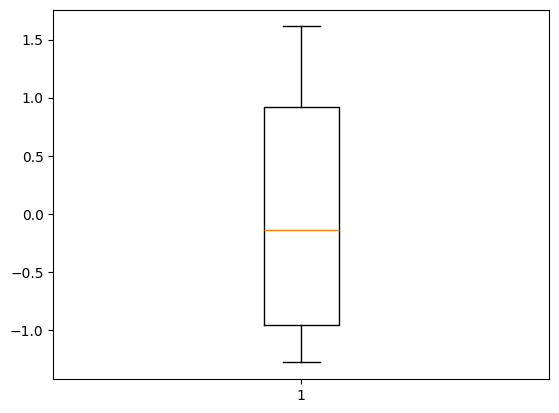

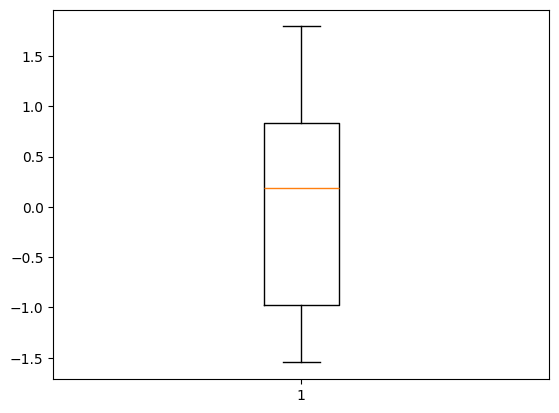

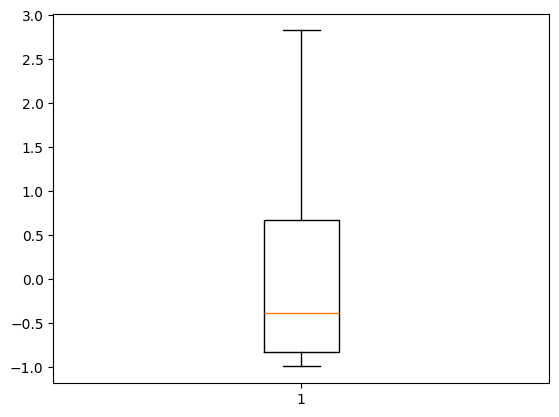

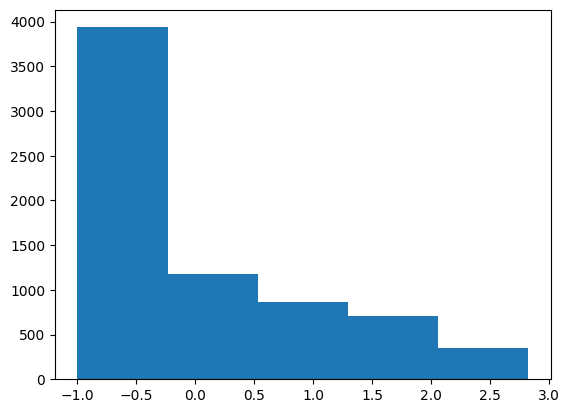

In [52]:
import matplotlib.pyplot as plt

# Create box plots for the numeric columns
plt.boxplot(df["tenure"])
plt.show()

plt.boxplot(df["MonthlyCharges"])
plt.show()

plt.boxplot(df["TotalCharges"])
plt.show()

plt.hist(df["TotalCharges"], bins = 5)
plt.show()

# Divide data into training and testing set

In [53]:
# Divide the data into training and test sets
from sklearn.model_selection import train_test_split

# Split into features(X) and target(y)
X = df.drop("Churn", axis = 1)
y = df["Churn"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Check the shape of the splits
print(f'Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}')

Training data shape: (5625, 26), Testing data shape: (1407, 26)


# Model building

In [56]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)          
print(f'Confusion matrix: {conf_matrix}')

# Calculate the precision, recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.806680881307747
Confusion matrix: [[934 104]
 [168 201]]
Precision: 0.659016393442623, Recall: 0.5447154471544715, F1 Score: 0.5964391691394659


In [57]:
# Train a random forest model
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix: {conf_matrix}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.7931769722814499
Confusion matrix: [[926 112]
 [179 190]]
Precision: 0.6291390728476821, Recall: 0.5149051490514905, F1 Score: 0.5663189269746647


In [58]:
# Train a support vector machine model
from sklearn.svm import SVC

# Create an instance of the model
svc = SVC()

# Fit the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix: {conf_matrix}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')


Accuracy: 0.8038379530916845
Confusion matrix: [[957  81]
 [195 174]]
Precision: 0.6823529411764706, Recall: 0.4715447154471545, F1 Score: 0.5576923076923077


In [59]:
# Train a K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.7683013503909026


### By analyzing all the results we can use Logistic Regression for this problem and convert it into a pickle file

In [60]:
# Convert the logistic regression model to a pickle file
import pickle

# Save the model using pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

